In [ ]:
import pandas as pd
import keras as keras
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd '/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3' && pwd
prefix= '/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3'


Mounted at /content/drive
/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3


In [ ]:
# 3 y 4
paths = [
           str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses01/"),
               str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses02/"),
             str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses03/") ,
     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses04/") ,
     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses05/") ,
    str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses06/") ,
    str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses07/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test01/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test02/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test03/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_train01/") ,

           str(os.getcwd() +prefix+"/pruebas/test/javier/ses01/"),  #90
              str(os.getcwd() +prefix+"/pruebas/test/javier/ses02/"), #62
           str(os.getcwd() +prefix+"/pruebas/test/javier/ses03/"),
                str(os.getcwd() +prefix+"/pruebas/test/javier/ses04/"),
                  str(os.getcwd() +prefix+"/pruebas/test/javier/ses05/"), #100
                 str(os.getcwd() +prefix+"/pruebas/test/javier/ses06/"),
             str(os.getcwd() +prefix+"/pruebas/test/javier/ses07/"),
            str(os.getcwd() +prefix+"/pruebas/test/javier/ses08/"),      #60
           str(os.getcwd()+prefix +"/pruebas/test/javier/ses09/")   ,
                 str(os.getcwd()+prefix +"/pruebas/test/javier/ses10/")   ,
                str(os.getcwd()+prefix +"/pruebas/test/javier/ses11/")   , #60
                  str(os.getcwd() +prefix+"/pruebas/test/javier/ses12/")   ,


    #  str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses01/")     ,
    #  str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses02/")     ,
    #   str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses03/")     ,
    #   str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses04/")     ,

        ]

def load_data(paths):
    dfRaw = []
    X_emot_train = []
    y_emot_train =[]
    filter=[]
    filterLastRows = 2
    i=0
    # print (paths)
    for path in paths:
        dfHead = pd.read_csv(path + 'head.csv')
        all_emot_files = glob.glob(os.path.join(path , "*_emotion*.csv"))
        # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])

        for filename in all_emot_files:
            dfRaw = pd.read_csv(filename, index_col=None, header=0, delimiter=',')
            # dfRaw = dfRaw[:,5:]
            # print(np.array(dfRaw))
            if len(dfRaw)>=filterLastRows:
                qCode = dfRaw['questionCode'].iloc[[0]][0]
                # print(dfRaw[3:])
                X_emot_train.append([])
                # X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
                # print(qCode)
                X = np.array(dfRaw.tail(filterLastRows))
                scaler = MinMaxScaler()
                # transform data
                X = X[:,5:]
                # X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
                # X = X/np.std(X)
                for idx, it in enumerate(X):
                    # print(X[idx][5:])
                    X_emot_train[i].append([])
                    X_emot_train[i][idx] =X[idx][5:]
                    # X_emot_train[i][idx].append([])
                    # X_emot_train[i][idx][0] = X[idx]


                y_emot_train.append([])
                y_emot_train[i].append([])
                y_emot_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
                i=i+1
    return X_emot_train,y_emot_train


X_emot_train = []
y_emot_train =[]
X_emot_train,y_emot_train= load_data(paths)
X = np.array(X_emot_train)
y = np.array(y_emot_train)
X.shape, y.shape
# X_emot_train

((225, 2, 5), (225, 1))

In [ ]:
# 1,2 funcionan bien
test_paths = [
           # str(os.getcwd() +"/pruebas/test/javier/ses01/"),  #90
           #    str(os.getcwd() +"/pruebas/test/javier/ses02/"), #62
           # str(os.getcwd() +"/pruebas/test/javier/ses03/"),
           #      str(os.getcwd() +"/pruebas/test/javier/ses04/"),
           #        str(os.getcwd() +"/pruebas/test/javier/ses05/"), #100
           #       str(os.getcwd() +"/pruebas/test/javier/ses06/"),
           #   str(os.getcwd() +"/pruebas/test/javier/ses07/"),
           #  str(os.getcwd() +"/pruebas/test/javier/ses08/"),      #60
           # str(os.getcwd() +"/pruebas/test/javier/ses09/")   ,
           #       str(os.getcwd() +"/pruebas/test/javier/ses10/")   ,
           #      str(os.getcwd() +"/pruebas/test/javier/ses11/")   , #60
           #        str(os.getcwd() +"/pruebas/test/javier/ses12/")   ,


    str(os.getcwd() +"/pruebas/test/silvia/ses01/")   ,
    str(os.getcwd() +"/pruebas/test/silvia/ses02/")      ,
    str(os.getcwd() +"/pruebas/test/silvia/ses03/")     ,
     str(os.getcwd() +"/pruebas/test/silvia/ses04/")     ,
        str(os.getcwd() +"/pruebas/test/silvia/sesbal/")     ,


]

# paths = [
#          # str(os.getcwd() +"/pruebas/preguntas_01-30/javier/ses01/")
#           # str(os.getcwd() +"/pruebas/preguntas_01-30/javier/ses02/")
#          # str(os.getcwd() +"/pruebas/preguntas_01-30/javier/ses03/")
#         ]
x_test_raw, y_test_raw = load_data(test_paths)
x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)

# y_test_raw
# x_test_raw
x_test.shape

(37, 2, 5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    plt.figure(figsize=(2,2))
    labels = ['0: No', '1: Si']
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    print(classification_report(y_test,pred_y))


5
(5, 26)


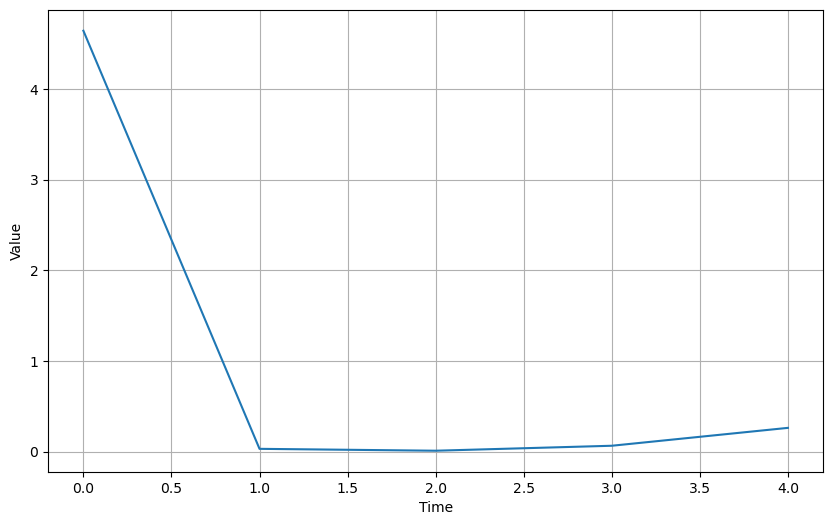

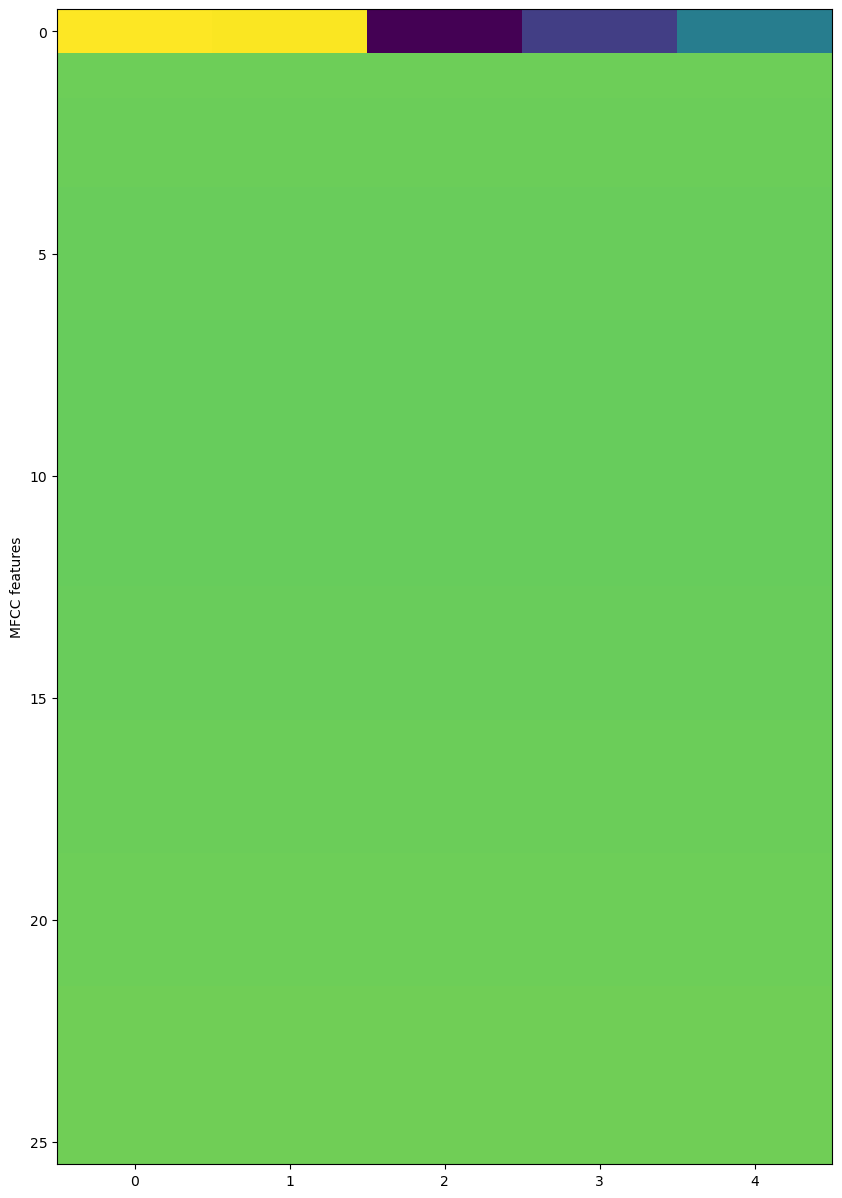

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from python_speech_features import mfcc

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


def get_timed_series(dataArr):
    time_step = []
    data = []
    step=0
    for row in dataArr:
        data.append(float(row))
        # print(row[3])
        time_step.append(step)
        step = step + 1
    return np.array(time_step),np.array(data)



input_signal =X[0][0]

time,series = get_timed_series(input_signal)
plt.figure(figsize=(10, 6))
plot_series(time, series)





fig, ax_list = plt.subplots(nrows=1, figsize=(10, 15), gridspec_kw={'wspace': 0, 'hspace': 0.2}, dpi=100)

window = 1
step = 1


# Pot MFCC spectrogram of input signal
ax = ax_list
def convert_to_mfccs(wav):
    return mfcc(wav, 1, winstep=step, winlen=window, numcep=26)

data = convert_to_mfccs(input_signal)
print(len(data))
print(data.shape)


presentation_steps = np.arange(data.shape[0])
ax.imshow(data.T, aspect="auto", interpolation="nearest")
ax.set_ylabel("MFCC features")


plt.show()



In [ ]:

#Split twice to get the validation set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
# X = np.asarray(X).astype(np.float32)
# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

# y_val_cat = y_train_cat =keras.utils.to_categorical(y_val,2)
# y_train_cat =keras.utils.to_categorical(y_train,2)


# X_train.shape,  y_train.shape, X_val.shape, y_val.shape, len(y_train),  len(y_val), y_val
# y_val_cat,
# # X_train


In [ ]:
X = np.asarray(X).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2

y_val_cat =keras.utils.to_categorical(y_val,2)
y_train_cat =keras.utils.to_categorical(y_train,2)
y_test_cat =keras.utils.to_categorical(y_test,2)

X_train.shape, y_train.shape,X_test.shape,y_test.shape,X_val.shape, y_val.shape

((135, 2, 5), (135, 1), (45, 2, 5), (45, 1), (45, 2, 5), (45, 1))

In [ ]:
X_train,y_train,y_train_cat
X_train.shape

(35, 3, 5)

In [ ]:
#modelo 0
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model = keras.Sequential()

# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=(X_train.shape[1], 1)))
# input_shape=(None,1)
input_shape=(X_train.shape[1],X_train.shape[2])
# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=input_shape))
model.add(LSTM(64, return_sequences=True,input_shape=input_shape))
model.add(LSTM(64, return_sequences=True,input_shape=input_shape))
model.add(LSTM(64))
# model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
model.add(keras.layers.BatchNormalization())
# model.add(Dense(32, input_shape=input_shape, activation='tanh'))
model.add(Dense(32, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17920     
                                                                 
 lstm_1 (LSTM)               (None, 2, 64)             33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                        

Epoch 1/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0385 - accuracy: 0.9852 - val_loss: 1.7269 - val_accuracy: 0.5333
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0658 - accuracy: 0.9704 - val_loss: 1.7574 - val_accuracy: 0.5556
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0727 - accuracy: 0.9630 - val_loss: 1.7586 - val_accuracy: 0.5556
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0453 - accuracy: 0.9704 - val_loss: 1.7728 - val_accuracy: 0.5111
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 1.8088 - val_accuracy: 0.5333
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 1.8527 - val_accuracy: 0.4889
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 0.9852 - val_loss: 1.8680 - val_accuracy: 0.4889
Epoch 8/100
5/5 [===

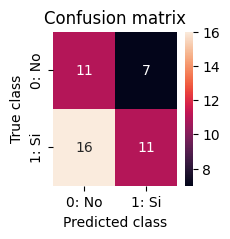

              precision    recall  f1-score   support

           0       0.41      0.61      0.49        18
           1       0.61      0.41      0.49        27

    accuracy                           0.49        45
   macro avg       0.51      0.51      0.49        45
weighted avg       0.53      0.49      0.49        45



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.9):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks0 =myCallback()

# history = model.fit(X_train, y_train_cat, epochs=14, batch_size=2, validation_data=(X_val, y_val_cat), shuffle=True)
# y_train_cat_b = [[1., 0.],[0., 1.],[1., 0.],[0., 1.],[1., 0.],[1., 0.],[0., 1.], [1., 0.],[1., 0.]]
history = model.fit(X_train, np.array(y_train_cat), epochs=100, batch_size=32,  validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks0])
# model.fit(train_set, epochs=2)

x_test = np.asarray(X_test).astype(np.float32)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [ ]:
model.save('model_javier_emot_22_model1_mixtraintest67.keras')

In [ ]:
#modelo 1
from keras.layers import Conv2D, LeakyReLU

keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model = keras.Sequential()

input_shape=(X_train.shape[1],X_train.shape[2])
# model.add(LSTM(64, input_shape=input_shape))
model.add(LSTM(64, return_sequences=True,input_shape=input_shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(LSTM(64, input_shape=input_shape))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))

# model.add(Dense(32, activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))


# model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
opt = keras.optimizers.Adam()
# opt = keras.optimizers.Adam(learning_rate=0.01)
# opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17920     
                                                                 
 batch_normalization (Batch  (None, 2, 64)             256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 51330 (200.51 KB)
Trainable params: 51202 (200.01 KB)
Non-trainable params: 128 (512.00 Byte)
______________

Epoch 1/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0360 - accuracy: 0.9852 - val_loss: 2.8240 - val_accuracy: 0.4667
Epoch 2/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 2.8189 - val_accuracy: 0.4667
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.8114 - val_accuracy: 0.4667
Epoch 4/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 2.8085 - val_accuracy: 0.4667
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.8120 - val_accuracy: 0.4667
Epoch 6/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 2.8028 - val_accuracy: 0.4667
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 0.0113 - accuracy: 0.9926 - val_loss: 2.8273 - val_accuracy: 0.4667
Epoch 8/200
5/5 [===

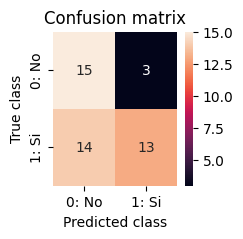

              precision    recall  f1-score   support

           0       0.52      0.83      0.64        18
           1       0.81      0.48      0.60        27

    accuracy                           0.62        45
   macro avg       0.66      0.66      0.62        45
weighted avg       0.69      0.62      0.62        45



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.55 and logs.get('accuracy')> 0.8):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks1 =myCallback()

# history = model.fit(X_train, y_train_cat, epochs=14, batch_size=2, validation_data=(X_val, y_va l_cat), shuffle=True)
# y_train_cat_b = [[1., 0.],[0., 1.],[1., 0.],[0., 1.],[1., 0.],[1., 0.],[0., 1.], [1., 0.],[1., 0.]]
history = model.fit(X_train, np.array(y_train_cat), epochs=200, batch_size=32,  validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks1])
# model.fit(train_set, epochs=2)

x_test = np.asarray(x_test).astype(np.float32)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)


In [ ]:

x_flat
X.shape, x_test.shape


((150, 2, 5), (37, 2, 5))

135
45
(135, 10)
(135, 1)
0.5555555555555556


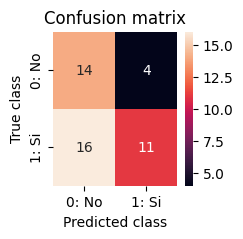

              precision    recall  f1-score   support

           0       0.47      0.78      0.58        18
           1       0.73      0.41      0.52        27

    accuracy                           0.56        45
   macro avg       0.60      0.59      0.55        45
weighted avg       0.63      0.56      0.55        45



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

def get_flat(X1,Y1):
    x_flat =[]
    y_flat =[]
    # x_flat =np.array
    # y_flat =np.array
    print(str(len(X1)))
    for idx, itx in enumerate(X1):
    # for idx in range(0, len(X1), 2):
        # print(idx)
        # itx= X1[idx]
        x = []
        for idy, ity in enumerate(X1[idx]):
            # x = []
            # x.append(idx)
            # x.append(idy)

            for idz, itz in enumerate(X1[idx][idy]):
                x.append(itz)

        if (len(x)>14):
            print("len big:" + str(itx))
        x_flat.append(x)
        y_flat.append(Y1[idx])

        # itx= X1[idx+1]
        # for idy, ity in enumerate(X1[idx+1]):
        #     x = []
        #     # x.append(idx)
        #     # x.append(idy)
        #     for idz, itz in enumerate(X1[idx+1][idy]):
        #         x.append(itz)
        #     if (len(x)>14):
        #         print("len big:" + str(itx))
        #     x_flat.append(x)
        #     y_flat.append(Y1[idx+1])


    x_flat = pd.DataFrame(x_flat)
    scaler = StandardScaler()
    x_flat = DataFrame(scaler.fit_transform(x_flat))
    y_flat = pd.DataFrame(y_flat)
    return x_flat,y_flat


X_train_flat,y_train_flat = get_flat(X_train,y_train)

X_test_flat, y_test_flat = get_flat(X_test,y_test)
# X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(x_flat, y_flat, test_size=0.25)
# X_train_flat.shape, y_train_flat.shape
# print(X)
# print(X_train_flat)
X.shape, X_train_flat.shape ,y_train_flat.shape
# X.shape, y.shape

print(X_train_flat.shape)
print(y_train_flat.shape)
# defatul: C=1, gamma=scale, kernel=rbf
# model_svc = SVC()
# model_svc = SVC(C=0.1, kernel='rbf', gamma='scale')  #javier 2 row 54
# model_svc = SVC(C=1, kernel='rbf', gamma='auto')
# model_svc = SVC(C=0.7, kernel='linear')  # silvia 1 row 59

# model_svc = SVC(gamma=0.03)
# model_svc = SVC(C=0.12, kernel='linear') #javier 1 row 54
# model_svc = SVC(C=0.10, kernel='linear')
model_svc = SVC(C=12, kernel='sigmoid') #jav 55


model_svc.fit(X_train_flat, y_train_flat)

score = model_svc.score(X_test_flat, y_test_flat)
print(score)

pred = model_svc.predict(X_test_flat)
show_results(y_test_flat,pred)

In [ ]:
from joblib import dump, load
dump(model_svc, 'model_javier_emot_svc_07_c500linear_60alltraintestmixed.svc')

['model_javier_emot_svc_07_c500linear_60alltraintestmixed.svc']

In [ ]:
# model_svc = load('model_javier_emot_svc_07_c500linear_60alltraintestmixed.svc')

pred = model_svc.predict(X_test_flat)
show_results(y_test_flat,pred)

ValueError: X has 5 features, but SVC is expecting 7 features as input.

In [ ]:
from joblib import dump, load
# dump(model_svc, 'model_silvia_emot_svc_15_ses04_scvc10linear_79alltestbal.sv')
# dump(model_svc, 'model_javier_emot_svc_03_c10linear_80alltest.svc')

['model_silvia_emot_svc_15_ses04_scvc10linear_79alltestbal.sv']

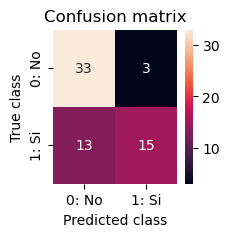

              precision    recall  f1-score   support

           0       0.72      0.92      0.80        36
           1       0.83      0.54      0.65        28

    accuracy                           0.75        64
   macro avg       0.78      0.73      0.73        64
weighted avg       0.77      0.75      0.74        64



In [ ]:
from joblib import dump, load
# dump(model_svc, 'model_silvia_emot_svc_02_70alltest.sv')
# dump(model_svc, 'model_silvia_emot_svc_02_70alltest.sv')
# model_svc.save('model_silvia_raw_cep_svc_65alltest.svc')
# model_svc = load('model_javier_raw_cep_svc.svc')

['model_silvia_raw_cep_svc_02_70alltest.sv']

In [ ]:
# model.save('model_javier_emot_11_alltest62.keras')
# model.save('model_silvia_emot_01_alltest72.keras')
# model = keras.models.load_model('model_javier_emot_06.keras')
# np.asarray(X).astype(np.float32)


In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 2, 5) <dtype: 'float32'>
(None, 2) <dtype: 'float32'>
lstm (None, 2, 5) float32
dense (None, 25) float32
dense_1 (None, 32) float32
dense_2 (None, 128) float32
dense_3 (None, 128) float32


[None, None, None, None, None]

1/1 [==============================] - 0s 417ms/step


1/1 [==============================] - 1s 941ms/step


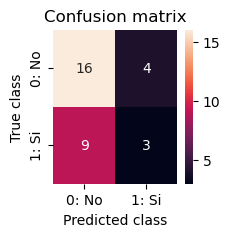

              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.43      0.25      0.32        12

    accuracy                           0.59        32
   macro avg       0.53      0.53      0.51        32
weighted avg       0.56      0.59      0.56        32



In [ ]:
y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
# y_val_cat
# y_val
y_val2=  [np.argmax(i) for i in y_val_cat]
# X_val.shape,y_val2, y_pred2


show_results(y_val,y_pred2)

In [ ]:
# def load_test_data(paths):
#     dfRaw = []
#     X_emot_train = []
#     y_emot_train =[]
#     filter=[]
#     filterLastRows = 2
#     i=0
#     # print (paths)
#     for path in paths:
#         dfHead = pd.read_csv(path + 'head.csv')
#         all_emot_files = glob.glob(os.path.join(path , "*_emoti*.csv"))
#         # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])

#         for filename in all_emot_files:
#             dfRaw = pd.read_csv(filename, index_col=None, header=0, delimiter=',')
#             # dfRaw = dfRaw[:,5:]
#             # print(filename)
#             if len(dfRaw)>=filterLastRows:
#                 qCode = dfRaw['questionCode'].iloc[[0]][0]
#                 # print(dfRaw[3:])
#                 X_emot_train.append([])
#                 # X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
#                 # print(qCode)
#                 X = np.array(dfRaw.tail(filterLastRows))
#                 # scaler = MinMaxScaler()
#                 # transform data
#                 X = X[:,5:]
#                 # X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
#                 # X = X/np.std(X)
#                 for idx, it in enumerate(X):
#                     # print(X[idx][5:])
#                     X_emot_train[i].append([])
#                     X_emot_train[i][idx] =X[idx][5:]
#                     # X_emot_train[i][idx].append([])
#                     # X_emot_train[i][idx][0] = X[idx]


#                 y_emot_train.append([])
#                 y_emot_train[i].append([])
#                 y_emot_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
#                 i=i+1
#     return X_emot_train,y_emot_train


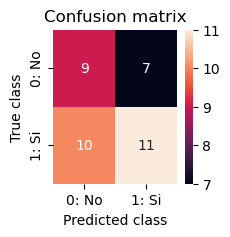

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.61      0.52      0.56        21

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.55      0.54      0.54        37



In [ ]:
# model = history.model
# model.save('model_javier_emot_02.keras')
model = load('model_silvia_emot_svc_15_ses04_scvc10linear_79alltestbal.sv')
pred = model_svc.predict(X_test_flat)
show_results(y_test_flat,pred)



In [ ]:
# model = keras.models.load_model('model_silvia_emot_02_4ses_alltest70.keras')
x_test = np.asarray(x_test).astype(np.float32)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [ ]:
# y_test_pred
# y_val2=  [np.argmax(i) for i in y_val_cat]
# y_test_pred2
# y_test,y_test_raw
# [np.argmax(i) for i in y_test_raw]

# y_test
# y_test_pred2

In [ ]:
# y_test